In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [ ]:
dataset = pd.read_csv('HR (Employee Turnover).csv')
colNames = dataset.columns.tolist()

print('Column Names: \n', colNames)
print('\nSample Data: ')
dataset.head()

Column Names: 
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']

Sample Data: 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:

dataset.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
dataset.shape
dataset['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
dataset['Department'] = np.where(dataset['Department'] == 
                                 'support', 'technical', 
                                 dataset['Department'])
dataset['Department'] = np.where(dataset['Department'] == 
                                 'IT', 'technical', 
                                 dataset['Department'])

In [ ]:
catVars = ['Department', 'salary']
for var in catVars:
  catList = 'var'+'_'+var
  catList = pd.get_dummies(dataset[var], prefix=var)
  hr = dataset.join(catList)
  dataset = hr

In [ ]:
dataset.drop(dataset.columns[[8, 9]], axis=1, inplace=True)
dataset.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [ ]:
hrVars=dataset.columns.values.tolist()
y=['left']
# y=np.ravel(y, order='F')
x=[i for i in hrVars if i not in y]

In [ ]:
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe = rfe.fit(hr[x], hr[y])
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[ True  True  True  True  True  True False False False False False False
 False  True  True  True  True False]
[1 1 1 1 1 1 3 6 5 4 7 8 9 1 1 1 1 2]


Columns: satisfaction_level, last_evaluation,
number_project, average_montly_hours, time_spend_company,
Work_accident, Department_sales, Department_technical,
salary_high, salary_low

In [ ]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'Department_sales', 'Department_technical', 'salary_high', 'salary_low']
x = dataset[cols]
y = dataset['left']

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)

RandomForestClassifier()

In [ ]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(yTest, rf.predict(xTest))))

Random Forest Accuracy: 0.990


In [ ]:
print(classification_report(yTest, rf.predict(xTest)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



Text(0.5, 1.0, 'Random Forest')

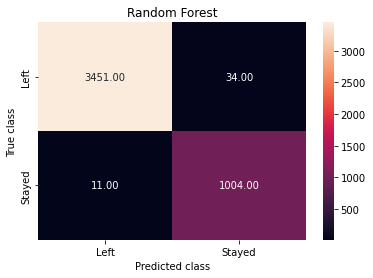

In [ ]:
yPred = rf.predict(xTest)
forest_cm = confusion_matrix(yPred, yTest)
sns.heatmap(forest_cm, annot=True, fmt='.2f',
            xticklabels = ['Left', 'Stayed'],
            yticklabels = ['Left', 'Stayed'])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

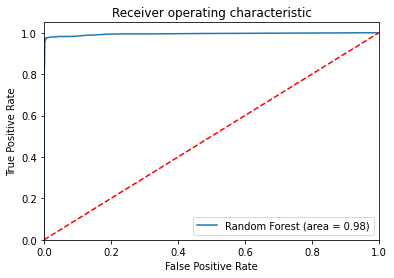

In [ ]:
rf_roc_auc = roc_auc_score(yTest, rf.predict(xTest))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(yTest, rf.predict_proba(xTest)[:,1])
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
featureLabels = np.array(['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company', 'Work_accident',
                'Department_sales', 'Department_technical', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
featureIndexesByImportance = importance.argsort()
for index in featureIndexesByImportance:
  print('{}-{:.2f}%'.format(featureLabels[index], (importance[index] *100.0)))

Department_sales-0.35%
salary_high-0.41%
Department_technical-0.42%
Work_accident-0.59%
salary_low-0.69%
last_evaluation-12.03%
average_montly_hours-15.19%
number_project-16.91%
time_spend_company-19.01%
satisfaction_level-34.41%
